In [1]:
import swendsen_wang
import metropolis_mod
from IPython.display import display, Math

time for L=4 =>  10.9074 sec
time for L=8 =>  9.1542 sec
time for L=16 =>  10.3287 sec
time for L=32 =>  13.7022 sec


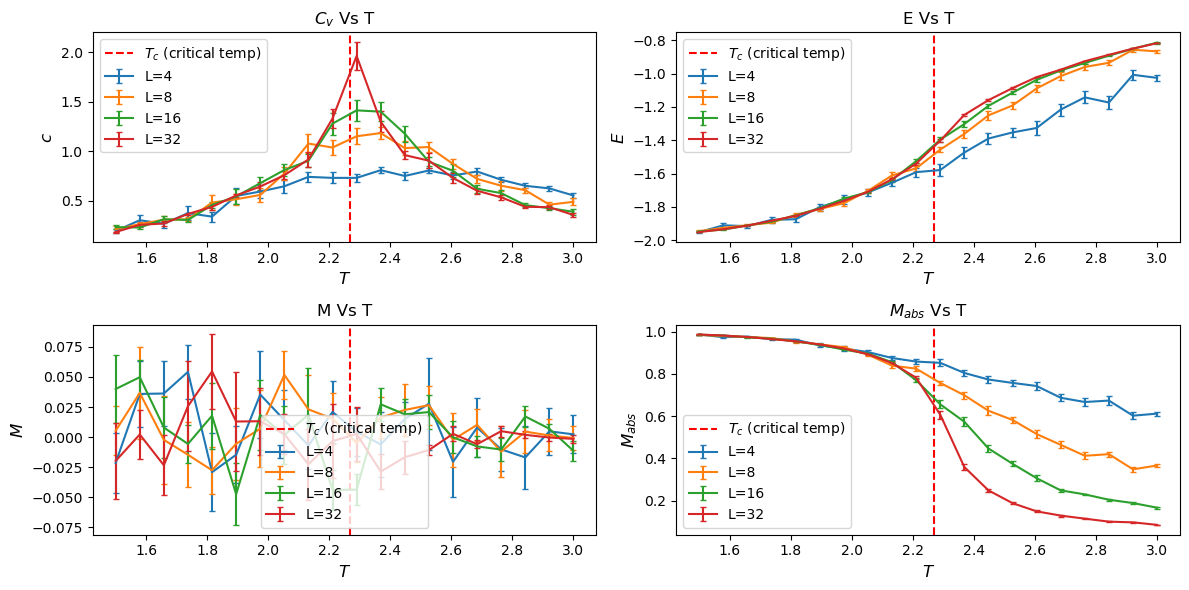

In [2]:
%run swendsen_wang.py

## Autocorrelations 
$$
C_{E/M}(\delta) = \frac{\langle E_{t+\delta} E_t \rangle_t - \langle E_t \rangle_t^2}{\langle E_t^2 \rangle_t - \langle E_t \rangle_t^2}
$$

<h4> integrated auto-correlation time $\LARGE\tau_{int}$ </h4>

$$
\large\tau_{\mathrm{int}} = \frac{1}{2} + \sum_{\delta = 1}^{\delta_{\max}} C_E(\delta)
$$


T= 2.00


<IPython.core.display.Math object>

<IPython.core.display.Math object>

T= 2.27


<IPython.core.display.Math object>

<IPython.core.display.Math object>

T= 3.00


<IPython.core.display.Math object>

<IPython.core.display.Math object>

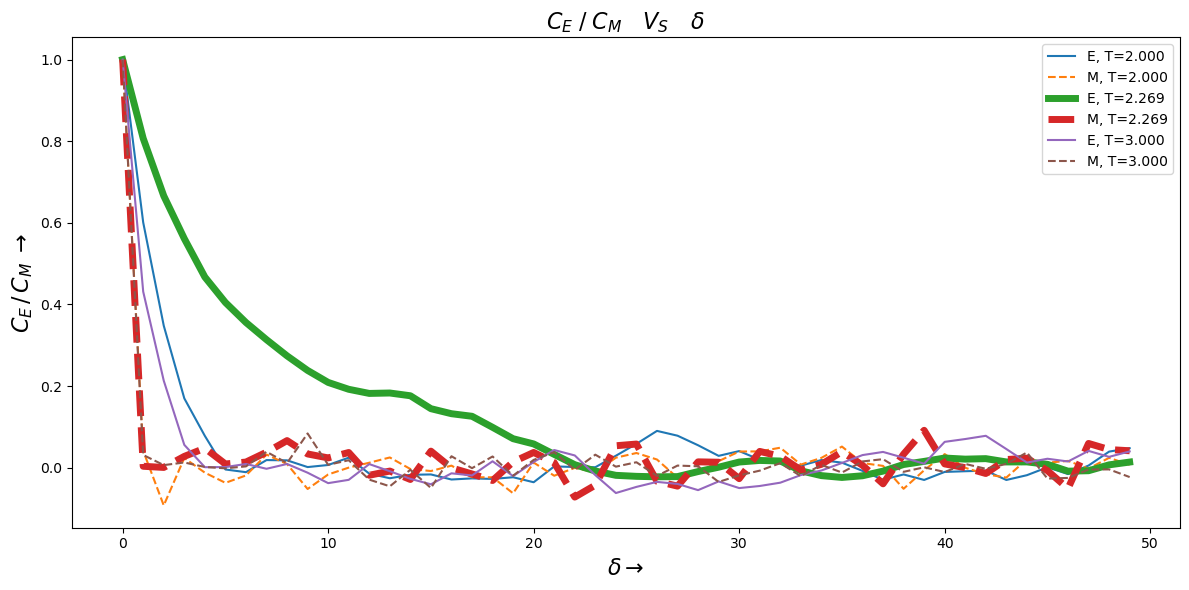

In [3]:
L = 64
deltas = np.arange(0, 50)
Tl =[2., Tc, 3.]

sys= swendsen_wang.init_lat(L, L)
bonds=swendsen_wang.gen_bonds(sys)

#taue = []
#taum =[]

plt.figure(figsize=(12, 6))

for T in Tl:
    print(f"T={T: .2f}")
    E, M = swendsen_wang.swendsen_simulation(sys, bonds, T, 1000, 10)
    
    cor_E = [a_cor(E, d) for d in deltas]
    display(Math(rf'C_E(\delta) \quad \tau_{{int}}  = {(0.5+np.sum(cor_E)): .3f} '))
   # taue.append(0.5+np.sum(cor_E))

    cor_M = [a_cor(M, d) for d in deltas]
    display(Math(rf'C_M(\delta) \quad\tau_{{int}}  = {(0.5+np.sum(cor_M)): .3f} '))
    #taum.append(0.5+np.sum(cor_M))
    
    plt.plot(deltas, cor_E, label=f"E, T={T:.3f}",linewidth =5 if T==Tc else 1.5 )
    plt.plot(deltas, cor_M, linestyle='--', label=f"M, T={T:.3f}", linewidth =5 if T==Tc else 1.5)

plt.legend(loc='upper right')
plt.xlabel(r'$\delta \rightarrow$', fontsize = 16)
plt.ylabel(r'$C_E \,/\, C_M \; \rightarrow$', fontsize = 16)
plt.title(r'$C_E\; /\; C_M \quad V_S \quad \delta$ ',fontsize = 16)
plt.tight_layout()
plt.show()

### auto correlation for Metropolis

T= 2.00


<IPython.core.display.Math object>

<IPython.core.display.Math object>

T= 2.27


<IPython.core.display.Math object>

<IPython.core.display.Math object>

T= 3.00


<IPython.core.display.Math object>

<IPython.core.display.Math object>

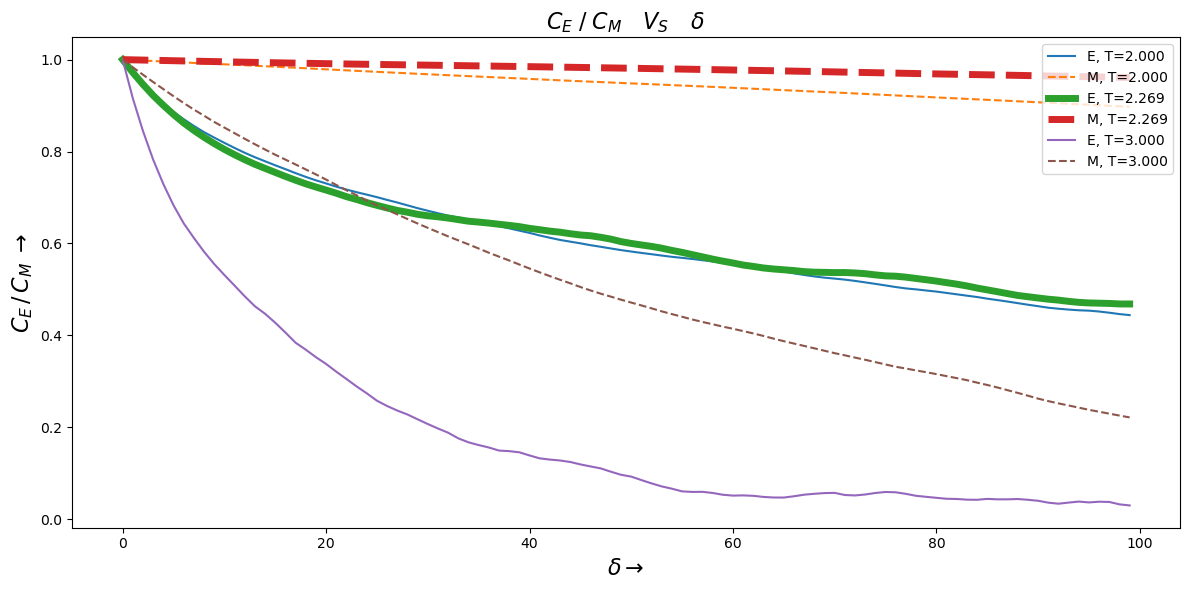

In [4]:
L =64
deltas = np.arange(0, 100)
Tl =[2., Tc, 3.]

sys= metropolis_mod.prepare_system(L,rng)

#taue = []
#taum =[]

plt.figure(figsize=(12, 6))

for T in Tl:
    print(f"T={T: .2f}")
    
    E, M = metropolis_mod.metropolis_loop_mod(sys,T, 1000*L**2, 10*L,10*L,rng)
    
    cor_E = [a_cor(E, d) for d in deltas]
    display(Math(rf'C_E(\delta), \quad \tau_{{int}}  = {(0.5+np.sum(cor_E)): .3f} '))
   # taue.append(0.5+np.sum(cor_E))
    
    cor_M = [a_cor(M, d) for d in deltas]
    display(Math(rf'C_M(\delta), \quad  \tau_{{int}}  = {(0.5+np.sum(cor_M)): .3f} '))
    #taum.append(0.5+np.sum(cor_M))
    
    plt.plot(deltas, cor_E, label=f"E, T={T:.3f}",linewidth =5 if T==Tc else 1.5 )
    plt.plot(deltas, cor_M, linestyle='--', label=f"M, T={T:.3f}", linewidth =5 if T==Tc else 1.5)

plt.legend(loc='upper right')
plt.xlabel(r'$\delta \rightarrow$', fontsize = 16)
plt.ylabel(r'$C_E \,/\, C_M \; \rightarrow$', fontsize = 16)
plt.title(r'$C_E\; /\; C_M \quad V_S \quad \delta$ ',fontsize = 16)
plt.tight_layout()
plt.show()